Dataset:
  
  https://s3.amazonaws.com/h2o-public-test-data/smalldata/chicago/Chicago_Ohare_International_Airport.csv
  
  https://s3.amazonaws.com/h2o-airlines-unpacked/allyears2k.csv

Use the Chicago Weather and Airlines dataset for the following chanllenge.

   1. Import chicago weather and airlines dataset.
   1. Transform weather data's Date column to three new columns "Year", "Month", "DayofMonth".
   1. Question: What is the range of the Year column in airlines dataset?
   1. Question: What is the range of the Year column in weather dataset?
   1. Filter airlines data to only flights outgoing or incoming to Chicago, ORD.
   1. Run a join of the two frames as you see fit, specify in the comments if you ran an outer left, outer right, or inner join.
   1. Run a GLM model on the resulting merged frame, you can regress on columns such as "IsDepDelayed", "IsArrDelayed", or "WeatherDelay". Pick predictors at your discretion.
   1. Provide some insight on the resulting model which can be a classification or regression model.

In [2]:
#importing libraries
import h2o
h2o.init()
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_101"; Java(TM) SE Runtime Environment (build 1.8.0_101-b13); Java HotSpot(TM) 64-Bit Server VM (build 25.101-b13, mixed mode)
  Starting server from /Users/mihirzgr8/anaconda/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/bc/btz_3q257nb_qgtzwwt7tj1m0000gn/T/tmpykini5mi
  JVM stdout: /var/folders/bc/btz_3q257nb_qgtzwwt7tj1m0000gn/T/tmpykini5mi/h2o_mihirzgr8_started_from_python.out
  JVM stderr: /var/folders/bc/btz_3q257nb_qgtzwwt7tj1m0000gn/T/tmpykini5mi/h2o_mihirzgr8_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.2
H2O cluster version age:,1 month and 18 days
H2O cluster name:,H2O_from_python_mihirzgr8_rwr1vd
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"


In [3]:
#importing the datasets
chicago="https://s3.amazonaws.com/h2o-public-test-data/smalldata/chicago/Chicago_Ohare_International_Airport.csv"
weather=h2o.import_file(path=chicago)
air="https://s3.amazonaws.com/h2o-airlines-unpacked/allyears2k.csv"
airlines=h2o.import_file(path=air)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
airlines.describe()

Rows:43978
Cols:31




,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
type,int,int,int,int,int,int,int,int,enum,int,enum,int,int,int,int,int,enum,enum,int,int,int,int,enum,int,int,int,int,int,int,enum,enum
mins,1987.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,,1.0,,16.0,17.0,14.0,-63.0,-16.0,,,11.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,,
mean,1997.5,1.4090909090909094,14.601073263904684,3.820614852880986,1345.8466613820758,1313.2228614307157,1504.6341303788895,1485.2891673109277,,818.8429896766567,,124.81452913540424,125.02156260661894,114.3161110907826,9.31711193698432,10.007390655600114,,,730.1821905650504,5.381368059530624,14.16863418473206,0.024694165264450407,,0.0024785119832643593,4.047800291055633,0.2893764692712415,4.855031904175528,0.017015560282100085,7.620060450016787,,
maxs,2008.0,10.0,31.0,7.0,2400.0,2359.0,2400.0,2359.0,,3949.0,,475.0,437.0,402.0,475.0,473.0,,,3365.0,128.0,254.0,1.0,,1.0,369.0,201.0,323.0,14.0,373.0,,
sigma,6.3443609017107025,1.8747113713439636,9.17579042586145,1.905013119132896,465.3408991242338,476.2511399925997,484.347487903516,492.7504341227009,,777.4043691636348,,73.9744416605902,73.4015946300093,69.63632951506105,29.840221962414834,26.438809042916446,,,578.4380082304242,4.201979939864827,9.905085747204334,0.15519314135784237,,0.049723487218862286,16.205729904484194,4.4167798987341245,18.619776221475686,0.4039401821015118,23.487565874106213,,
zeros,0,0,0,0,0,569,0,569,,0,,0,0,0,1514,6393,,,0,623,557,42892,,43869,7344,8840,7388,8914,7140,,
missing,0,0,0,0,1086,0,1195,0,0,0,32,1195,13,16649,1195,1086,0,0,35,16026,16024,0,9774,0,35045,35045,35045,35045,35045,0,0
0,1987.0,10.0,14.0,3.0,741.0,730.0,912.0,849.0,PS,1451.0,NA,91.0,79.0,nan,23.0,11.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,YES
1,1987.0,10.0,15.0,4.0,729.0,730.0,903.0,849.0,PS,1451.0,NA,94.0,79.0,nan,14.0,-1.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,NO
2,1987.0,10.0,17.0,6.0,741.0,730.0,918.0,849.0,PS,1451.0,NA,97.0,79.0,nan,29.0,11.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,YES


In [5]:
#Split Date column of weather data in 3 columns-year, month, day
weather['Year']=weather['Date'].year()
weather['Month']=weather['Date'].month()
weather['DayofMonth']=weather['Date'].day()

In [6]:
weather.describe()

Rows:1461
Cols:12




,Date,TmaxF,TminF,TmeanF,PrcpIn,SnowIn,CDD,HDD,GDD,Year,Month,DayofMonth
type,time,int,int,real,real,real,real,real,real,int,int,int
mins,1104537600000.0,2.0,-10.0,-2.5,0.0,0.0,0.0,0.0,0.0,2005.0,1.0,1.0
mean,1167609600000.0,59.731006160164306,41.930869267624864,50.83093771389467,0.1258862324814508,0.13482210446631324,2.6830937713894594,16.85215605749488,9.037987679671465,2006.5010266940421,6.5229295003422445,15.729637234770715
maxs,1230681600000.0,102.0,80.0,90.0,6.64,8.8,25.0,67.5,40.0,2008.0,12.0,31.0
sigma,36452046342.55805,21.570103698776933,19.021473406264455,20.00830720652739,0.346369873627173,0.647605252469569,4.817865753839847,16.930054853264178,10.819760641130426,1.1187225040519035,3.449884042297707,8.803105254885079
zeros,0,0,4,0,695,1187,1001,471,704,0,0,0
missing,0,0,0,0,248,140,0,0,0,0,0,0
0,2005-01-01 00:00:00,41.0,25.0,33.0,0.31,0.0,0.0,32.0,0.0,2005.0,1.0,1.0
1,2005-01-02 00:00:00,54.0,33.0,43.5,0.08,0.0,0.0,21.5,0.0,2005.0,1.0,2.0
2,2005-01-03 00:00:00,36.0,32.0,34.0,0.36,0.0,0.0,31.0,0.0,2005.0,1.0,3.0


In [7]:
airlines['Year'].summary()
#Solution: Range(year) in Airlines dataset from 1987-2008

,Year
type,int
mins,1987.0
mean,1997.5
maxs,2008.0
sigma,6.3443609017107025
zeros,0
missing,0
0,1987.0
1,1987.0
2,1987.0


In [8]:
weather['Year'].summary()
#Solution: Range(year) in Weather dataset from 2005-2008

,Year
type,int
mins,2005.0
mean,2006.5010266940421
maxs,2008.0
sigma,1.1187225040519035
zeros,0
missing,0
0,2005.0
1,2005.0
2,2005.0


In [9]:
mask = airlines['Origin'] =='ORD'
cols_air = airlines[mask,:]

In [10]:
cols_air.shape

(2246, 31)

In [11]:
mask2=airlines['Dest']=="ORD"
cols=airlines[mask2,:]

In [12]:
cols.shape

(2103, 31)

In [13]:
filtered=cols_air.rbind(cols)

In [14]:
filtered.shape

(4349, 31)

In [15]:
originFlights=filtered.group_by('Origin')

In [16]:
originFlights.count()

GroupBy: 
  Frame: py_10_sid_b1e0; by=[16]
  Aggregates: dict_keys(['nrow_Year'])
*** Use get_frame() to get groupby frame ***


In [17]:
originFlights.get_frame()

Origin,nrow
ALB,5
ATL,37
BOS,108
BUF,25
BWI,35
CLE,6
CLT,58
CMH,48
DAY,47
DCA,71


In [18]:
airlines

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
1987,10,14,3,741,730,912,849,PS,1451,NA,91,79,nan,23,11,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,15,4,729,730,903,849,PS,1451,NA,94,79,nan,14,-1,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,NO
1987,10,17,6,741,730,918,849,PS,1451,NA,97,79,nan,29,11,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,18,7,729,730,847,849,PS,1451,NA,78,79,nan,-2,-1,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,NO,NO
1987,10,19,1,749,730,922,849,PS,1451,NA,93,79,nan,33,19,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,21,3,728,730,848,849,PS,1451,NA,80,79,nan,-1,-2,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,NO,NO
1987,10,22,4,728,730,852,849,PS,1451,NA,84,79,nan,3,-2,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,NO
1987,10,23,5,731,730,902,849,PS,1451,NA,91,79,nan,13,1,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,24,6,744,730,908,849,PS,1451,NA,84,79,nan,19,14,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,25,7,729,730,851,849,PS,1451,NA,82,79,nan,2,-1,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,NO


In [19]:
#Full outer join on the dataframes 
merged=filtered.merge(weather)

In [20]:
merged

Month,Year,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed,Date,TmaxF,TminF,TmeanF,PrcpIn,SnowIn,CDD,HDD,GDD
1,2005,1,6,2220,2045,119,2359,UA,544,N325UA,119,134,103,80,95,ORD,BOS,867,2,14,0,,0,58,0,0,0,22,YES,YES,2005-01-01 00:00:00,41,25,33,0.31,0,0,32,0
1,2005,1,6,2342,2115,151,2319,UA,546,N386UA,69,64,42,152,147,ORD,DAY,240,7,20,0,,0,7,0,5,0,140,YES,YES,2005-01-01 00:00:00,41,25,33,0.31,0,0,32,0
1,2005,1,6,1303,1205,1435,1329,UA,547,N849UA,92,84,69,66,58,ORD,MSP,334,8,15,0,,0,0,0,8,0,58,YES,YES,2005-01-01 00:00:00,41,25,33,0.31,0,0,32,0
1,2005,1,6,1213,1215,1344,1353,UA,553,N912UA,91,98,73,-9,-2,ORD,OMA,416,3,15,0,,0,0,0,0,0,0,NO,NO,2005-01-01 00:00:00,41,25,33,0.31,0,0,32,0
1,2005,1,6,646,650,901,916,UA,556,N914UA,75,86,60,-15,-4,ORD,PIT,412,4,11,0,,0,0,0,0,0,0,NO,NO,2005-01-01 00:00:00,41,25,33,0.31,0,0,32,0
1,2005,1,6,1457,1500,1755,1742,UA,559,N531UA,298,282,268,13,-3,ORD,SJC,1829,4,26,0,,0,0,0,0,0,0,YES,NO,2005-01-01 00:00:00,41,25,33,0.31,0,0,32,0
1,2005,1,6,1348,1335,1612,1615,UA,562,N938UA,84,100,62,-3,13,ORD,BUF,473,3,19,0,,0,0,0,0,0,0,NO,YES,2005-01-01 00:00:00,41,25,33,0.31,0,0,32,0
1,2005,1,6,nan,1605,nan,1828,UA,564,000000,nan,83,nan,nan,nan,ORD,CLE,316,0,0,1,A,0,0,0,0,0,0,YES,YES,2005-01-01 00:00:00,41,25,33,0.31,0,0,32,0
1,2005,1,6,2000,1955,2255,2231,UA,565,N342UA,235,216,198,24,5,ORD,SLC,1249,3,34,0,,0,0,0,24,0,0,YES,YES,2005-01-01 00:00:00,41,25,33,0.31,0,0,32,0
1,2005,1,6,1830,1745,2123,2053,UA,566,N932UA,113,128,89,30,45,ORD,ATL,606,5,19,0,,0,15,0,0,0,15,YES,YES,2005-01-01 00:00:00,41,25,33,0.31,0,0,32,0


In [21]:
merged['Year'].describe()

Rows:1087
Cols:1




,Year
type,int
mins,2005.0
mean,2005.0515179392833
maxs,2006.0
sigma,0.22115342082683845
zeros,0
missing,0
0,2005.0
1,2005.0
2,2005.0


In [33]:
response_columns= "IsDepDelayed"
merged['IsDepDelayed'] = merged['IsDepDelayed'].asfactor()
merged['IsArrDelayed'] = merged['IsArrDelayed'].asfactor()
merged['WeatherDelay'] = merged['WeatherDelay'].asfactor()

predictors = merged.col_names
predictors.remove('IsDepDelayed')
predictors.remove('IsArrDelayed')
predictors.remove('WeatherDelay')




In [32]:
train, valid, test = merged.split_frame(ratios=[.8, .1])

In [34]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
glm_logistic = H2OGeneralizedLinearEstimator(family = "binomial")
glm_logistic.train(x=predictors, y= response_columns, training_frame=train, validation_frame=valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [25]:
glm_logistic.varimp()

In [29]:
glm_logistic.model_performance()


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.11624142890868006
RMSE: 0.34094197293480905
LogLoss: 0.38316427057852365
Null degrees of freedom: 870
Residual degrees of freedom: 863
Null deviance: 1207.461240429542
Residual deviance: 667.4721593477882
AIC: 683.4721593477882
AUC: 0.9511705156596013
pr_auc: 0.9362945175049213
Gini: 0.9023410313192026
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39527902817781124: 


,NO,YES,Error,Rate
NO,384.0,51.0,0.1172,(51.0/435.0)
YES,49.0,387.0,0.1124,(49.0/436.0)
Total,433.0,438.0,0.1148,(100.0/871.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3952790,0.8855835,235.0
max f2,0.2887867,0.9019525,305.0
max f0point5,0.4503116,0.9206432,201.0
max accuracy,0.4248603,0.8897819,216.0
max precision,0.9999506,1.0,0.0
max recall,0.2207292,1.0,361.0
max specificity,0.9999506,1.0,0.0
max absolute_mcc,0.4248603,0.7828953,216.0
max min_per_class_accuracy,0.3961619,0.8850575,234.0
max mean_per_class_accuracy,0.4248603,0.8898344,216.0


Gains/Lift Table: Avg response rate: 50.06 %, avg score: 50.06 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0103330,0.9998949,1.9977064,1.9977064,1.0,0.9999572,1.0,0.9999572,0.0206422,0.0206422,99.7706422,99.7706422
,2,0.0206659,0.9971272,1.9977064,1.9977064,1.0,0.9983987,1.0,0.9991780,0.0206422,0.0412844,99.7706422,99.7706422
,3,0.0309989,0.9951626,1.9977064,1.9977064,1.0,0.9961369,1.0,0.9981643,0.0206422,0.0619266,99.7706422,99.7706422
,4,0.0401837,0.9939032,1.9977064,1.9977064,1.0,0.9947097,1.0,0.9973747,0.0183486,0.0802752,99.7706422,99.7706422
,5,0.0505166,0.9897648,1.9977064,1.9977064,1.0,0.9924232,1.0,0.9963619,0.0206422,0.1009174,99.7706422,99.7706422
,6,0.1010333,0.9486599,1.9977064,1.9977064,1.0,0.9728976,1.0,0.9846297,0.1009174,0.2018349,99.7706422,99.7706422
,7,0.1504018,0.8888590,1.9977064,1.9977064,1.0,0.9136270,1.0,0.9613235,0.0986239,0.3004587,99.7706422,99.7706422
,8,0.2009185,0.8393560,1.9977064,1.9977064,1.0,0.8693024,1.0,0.9381867,0.1009174,0.4013761,99.7706422,99.7706422
,9,0.3008037,0.6481688,1.9517821,1.9824568,0.9770115,0.7601109,0.9923664,0.8790547,0.1949541,0.5963303,95.1782136,98.2456755
,10,0.4006889,0.4754153,1.6991986,1.9118451,0.8505747,0.5517948,0.9570201,0.7974742,0.1697248,0.7660550,69.9198566,91.1845114


In [35]:
response_columns= ["IsDepDelayed","IsArrDelayed","WeatherDelay"]
merged['IsDepDelayed'] = merged['IsDepDelayed'].asfactor()
merged['IsArrDelayed'] = merged['IsArrDelayed'].asfactor()
merged['WeatherDelay'] = merged['WeatherDelay'].asfactor()

predictors = merged.col_names
predictors.remove('IsDepDelayed')
predictors.remove('IsArrDelayed')
predictors.remove('WeatherDelay')



In [40]:
response_columns= "IsDepDelayed"
merged['IsDepDelayed'] = merged['IsDepDelayed'].asfactor()
merged['IsArrDelayed'] = merged['IsArrDelayed'].asfactor()
merged['WeatherDelay'] = merged['WeatherDelay'].asfactor()

predictors = merged.col_names
predictors.remove('IsDepDelayed')
predictors.remove('IsArrDelayed')
predictors.remove('WeatherDelay')



In [41]:
# Define model
from h2o.estimators import H2ORandomForestEstimator
model = H2ORandomForestEstimator(ntrees=50, max_depth=20, nfolds=10)

# Train model
model.train(x=predictors, y=response_columns, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [44]:
performance = model.model_performance(test_data=test)

print (performance)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.014338343734653225
RMSE: 0.11974282331168422
LogLoss: 0.09044578525580202
Mean Per-Class Error: 0.0
AUC: 1.0
pr_auc: 0.6304347826086957
Gini: 1.0
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6: 


,NO,YES,Error,Rate
NO,62.0,0.0,0.0,(0.0/62.0)
YES,0.0,46.0,0.0,(0.0/46.0)
Total,62.0,46.0,0.0,(0.0/108.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.6,1.0,12.0
max f2,0.6,1.0,12.0
max f0point5,0.6,1.0,12.0
max accuracy,0.6,1.0,12.0
max precision,1.0,1.0,0.0
max recall,0.6,1.0,12.0
max specificity,1.0,1.0,0.0
max absolute_mcc,0.6,1.0,12.0
max min_per_class_accuracy,0.6,1.0,12.0
max mean_per_class_accuracy,0.6,1.0,12.0


Gains/Lift Table: Avg response rate: 42.59 %, avg score: 45.51 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.1574074,1.0,2.3478261,2.3478261,1.0,1.0,1.0,1.0,0.3695652,0.3695652,134.7826087,134.7826087
,2,0.1574074,0.999,0.0,2.3478261,0.0,0.0,1.0,1.0,0.0,0.3695652,-100.0,134.7826087
,3,0.2407407,0.98,2.3478261,2.3478261,1.0,0.9800000,1.0,0.9930769,0.1956522,0.5652174,134.7826087,134.7826087
,4,0.3055556,0.918,2.3478261,2.3478261,1.0,0.9386090,1.0,0.9815231,0.1521739,0.7173913,134.7826087,134.7826087
,5,0.4074074,0.8200000,2.3478261,2.3478261,1.0,0.8550239,1.0,0.9498983,0.2391304,0.9565217,134.7826087,134.7826087
,6,0.5092593,0.1800000,0.4268775,1.9636364,0.1818182,0.3436364,0.8363636,0.8286459,0.0434783,1.0,-57.3122530,96.3636364
,7,0.6203704,0.12,0.0,1.6119403,0.0,0.1420833,0.6865672,0.7056795,0.0,1.0,-100.0,61.1940299
,8,0.7129630,0.0800000,0.0,1.4025974,0.0,0.0905671,0.5974026,0.6257948,0.0,1.0,-100.0,40.2597403
,9,0.7962963,0.0560684,0.0,1.2558140,0.0,0.0615561,0.5348837,0.5667465,0.0,1.0,-100.0,25.5813953
,10,0.9074074,0.0200000,0.0,1.1020408,0.0,0.0311645,0.4693878,0.5011651,0.0,1.0,-100.0,10.2040816


In [71]:
model.varimp()


[('ActualElapsedTime',
  181.59010314941406,
  0.044507263703449366,
  0.022099145964985776),
 ('AirTime', 59.76042556762695, 0.014647125441523893, 0.007272722161857075),
 ('ArrDelay', 1403.0736083984375, 0.3438897054480858, 0.17075120248212938),
 ('ArrTime', 181.91558837890625, 0.04458703928972494, 0.022138756854958544),
 ('CRSArrTime', 220.1394805908203, 0.05395561621623336, 0.02679052674048987),
 ('CRSDepTime', 78.37838745117188, 0.0192103396519916, 0.009538490230155726),
 ('CRSElapsedTime',
  53.698238372802734,
  0.013161299069820628,
  0.006534966318548495),
 ('CancellationCode',
  4.850827693939209,
  0.0011889252971925756,
  0.0005903358575172649),
 ('Cancelled', 22.29482078552246, 0.005464402799011209, 0.002713234313199681),
 ('CarrierDelay',
  179.25205993652344,
  0.04393421537085075,
  0.021814610864570084),
 ('Date', 35.1839485168457, 0.008623494604655666, 0.004281814925004777),
 ('DayOfWeek', 36.64724349975586, 0.008982144412936955, 0.0044598949461970945),
 ('DayofMonth',

In [63]:
cm=merged.cor().as_data_frame()

ValueError: cannot copy sequence with size 1087 to array axis with dimension 40

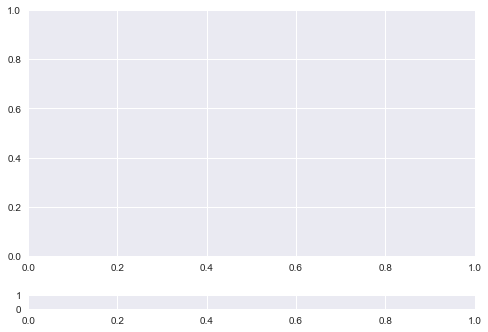

In [59]:
 grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
ax = sns.heatmap(merged, ax=ax,cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal"})

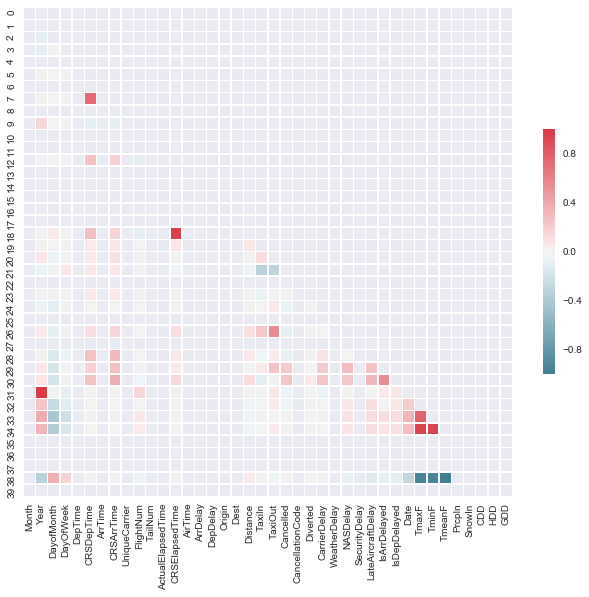

In [64]:
# Generate a mask for the upper triangle
import numpy as np
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cm, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [65]:
from six import iteritems
glm_varimp = glm_logistic.coef_norm()
for k,v in iteritems(glm_varimp):
    glm_varimp[k] = abs(glm_varimp[k])
    
# Sort in descending order by magnitude
glm_sorted = sorted(glm_varimp.items(), key = operator.itemgetter(1), reverse = True)
table = tabulate(glm_sorted, headers = ["Predictor", "Normalized Coefficient"], tablefmt = "orgtbl")
print("Variable Importances:\n\n" + table)


NameError: name 'operator' is not defined